# Group Project
by: Jenny Ren, 10/18/2020

## Problem Statement and Goal

## Highlights

- Proportion of Marijuana Use is higher in people with higher education
- Proportion of Marijuana Use is lower in people with employment 

## Load Data

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pandas_profiling as pp
import joblib
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#from lightgbm import LGBMClassifier
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from scipy import interp


In [2]:
tp = pd.read_csv('./NSDUH_2018_Tab.tsv', sep='\t', iterator=True, chunksize=1000, low_memory=False)
df = pd.concat(tp, ignore_index=True)
# print(df.shape)
# print(df.dtypes)
df.head()

,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,11015143,10/08/2019,1,99,99,12,9999,99,1,20,...,3.0,2,2,1,1,2,2,20783.261908,40001,1
1,86325143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,2,2,3,3,2,2,1095.884074,40004,1
2,35425143,10/08/2019,1,99,99,13,9999,99,4,93,...,3.0,2,2,2,2,2,2,374.445005,40017,2
3,98125143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,2,2,2,2,2,2,2421.263435,40038,2
4,15945143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,1,2,1,1,2,2,6637.319591,40040,2


## Data Wrangling

### Check if data has duplicated records

In [5]:
dropdata = [985, 994, 997, 998]
df = df[~df.MJYRTOT.isin(dropdata)]

In [6]:
df1 = df[["QUESTID2","IREDUHIGHST2","IRWRKSTAT","MJYRTOT","SEXIDENT","HEALTH2","WRKDRGEDU","YELSTGRD","YEYATTAK","YERLGIMP",'CIGEVER']]
df1.head()

,QUESTID2,IREDUHIGHST2,IRWRKSTAT,MJYRTOT,SEXIDENT,HEALTH2,WRKDRGEDU,YELSTGRD,YEYATTAK,YERLGIMP,CIGEVER
0,11015143,8,1,991,1,3.0,1,99,99,99,1
1,86325143,11,1,991,1,3.0,2,99,99,99,2
2,35425143,8,2,5,3,3.0,2,99,99,99,1
3,98125143,9,4,991,1,3.0,99,99,99,99,2
4,15945143,7,1,991,1,3.0,2,99,99,99,2


In [7]:
# check if data has duplicates

df_duplicate = df1[df1.duplicated(keep = 'first')]
percent = df_duplicate.shape[0] / df1.shape[0] * 100
print('%d rows (%.2f %%) are duplicates' %(df_duplicate.shape[0], percent))

0 rows (0.00 %) are duplicates


### Check if data has missing values

In [8]:
# check if data has missing values
print(df1.isnull().sum())

QUESTID2         0
IREDUHIGHST2     0
IRWRKSTAT        0
MJYRTOT          0
SEXIDENT         0
HEALTH2         13
WRKDRGEDU        0
YELSTGRD         0
YEYATTAK         0
YERLGIMP         0
CIGEVER          0
dtype: int64


In [9]:
df1.fillna(df1.mean(), inplace=True)

C:\Anaconda\Anaconda3\envs\insight\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### MJYRTOT 
- RANGE = 1 - 365
- 991 = NEVER USED MARIJUANA
- 993 = DID NOT USE MARIJUANA IN THE PAST 12 MOS

### IREDUHIGHST2 
- 1 = Fifth grade or less grade completed
- 2 = Sixth grade completed
- 3 = Seventh grade complete
- 4 = Eighth grade completed
- 5 = Ninth grade completed
- 6 = Tenth grade completed
- 7 = Eleventh or Twelfth grade completed, no diploma
- 8 = High school diploma/GED
- 9 = Some college credit, but no degree
- 10 = Associate's degree
- 11 = College graduate or higher

### IRWRKSTAT
- 1 = Employed full time
- 2 = Employed part time
- 3 = Unemployed
- 4 = Other (incl. not in labor force)
- 99 = 12-14 year olds

In [176]:
pp.ProfileReport(df1)

In [10]:
df1

,QUESTID2,IREDUHIGHST2,IRWRKSTAT,MJYRTOT,SEXIDENT,HEALTH2,WRKDRGEDU,YELSTGRD,YEYATTAK,YERLGIMP,CIGEVER
0,11015143,8,1,991,1,3.0,1,99,99,99,1
1,86325143,11,1,991,1,3.0,2,99,99,99,2
2,35425143,8,2,5,3,3.0,2,99,99,99,1
3,98125143,9,4,991,1,3.0,99,99,99,99,2
4,15945143,7,1,991,1,3.0,2,99,99,99,2
...,...,...,...,...,...,...,...,...,...,...,...
56308,71224730,5,2,991,99,2.0,2,2,1,4,2
56309,69424730,7,2,260,99,2.0,1,2,1,1,1
56310,13024730,9,2,991,1,1.0,2,99,99,99,2
56311,85634730,8,1,300,1,2.0,2,99,99,99,1


In [11]:
df1 = df1.drop("QUESTID2", axis=1)
df1["IRWRKSTAT"] = df1["IRWRKSTAT"].apply(lambda x: 5 if x > 4 else x)
df1['MJYRTOT'] = df1['MJYRTOT'].apply(lambda x: 1 if x < 366 else 0)
df1['CIGEVER'] = df1['CIGEVER'].apply(lambda x: 1 if x == 1 else 0)

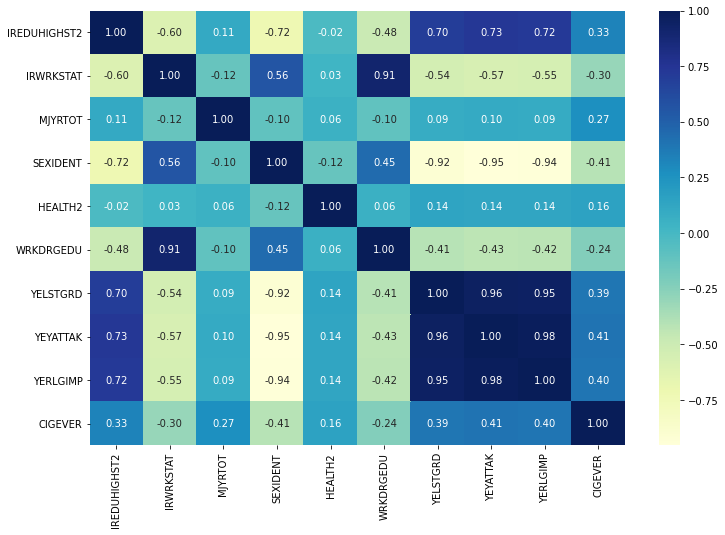

In [12]:
f = plt.figure(figsize=(12, 8))
corr_table = df1.corr(method='pearson')
sns.heatmap(corr_table, cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

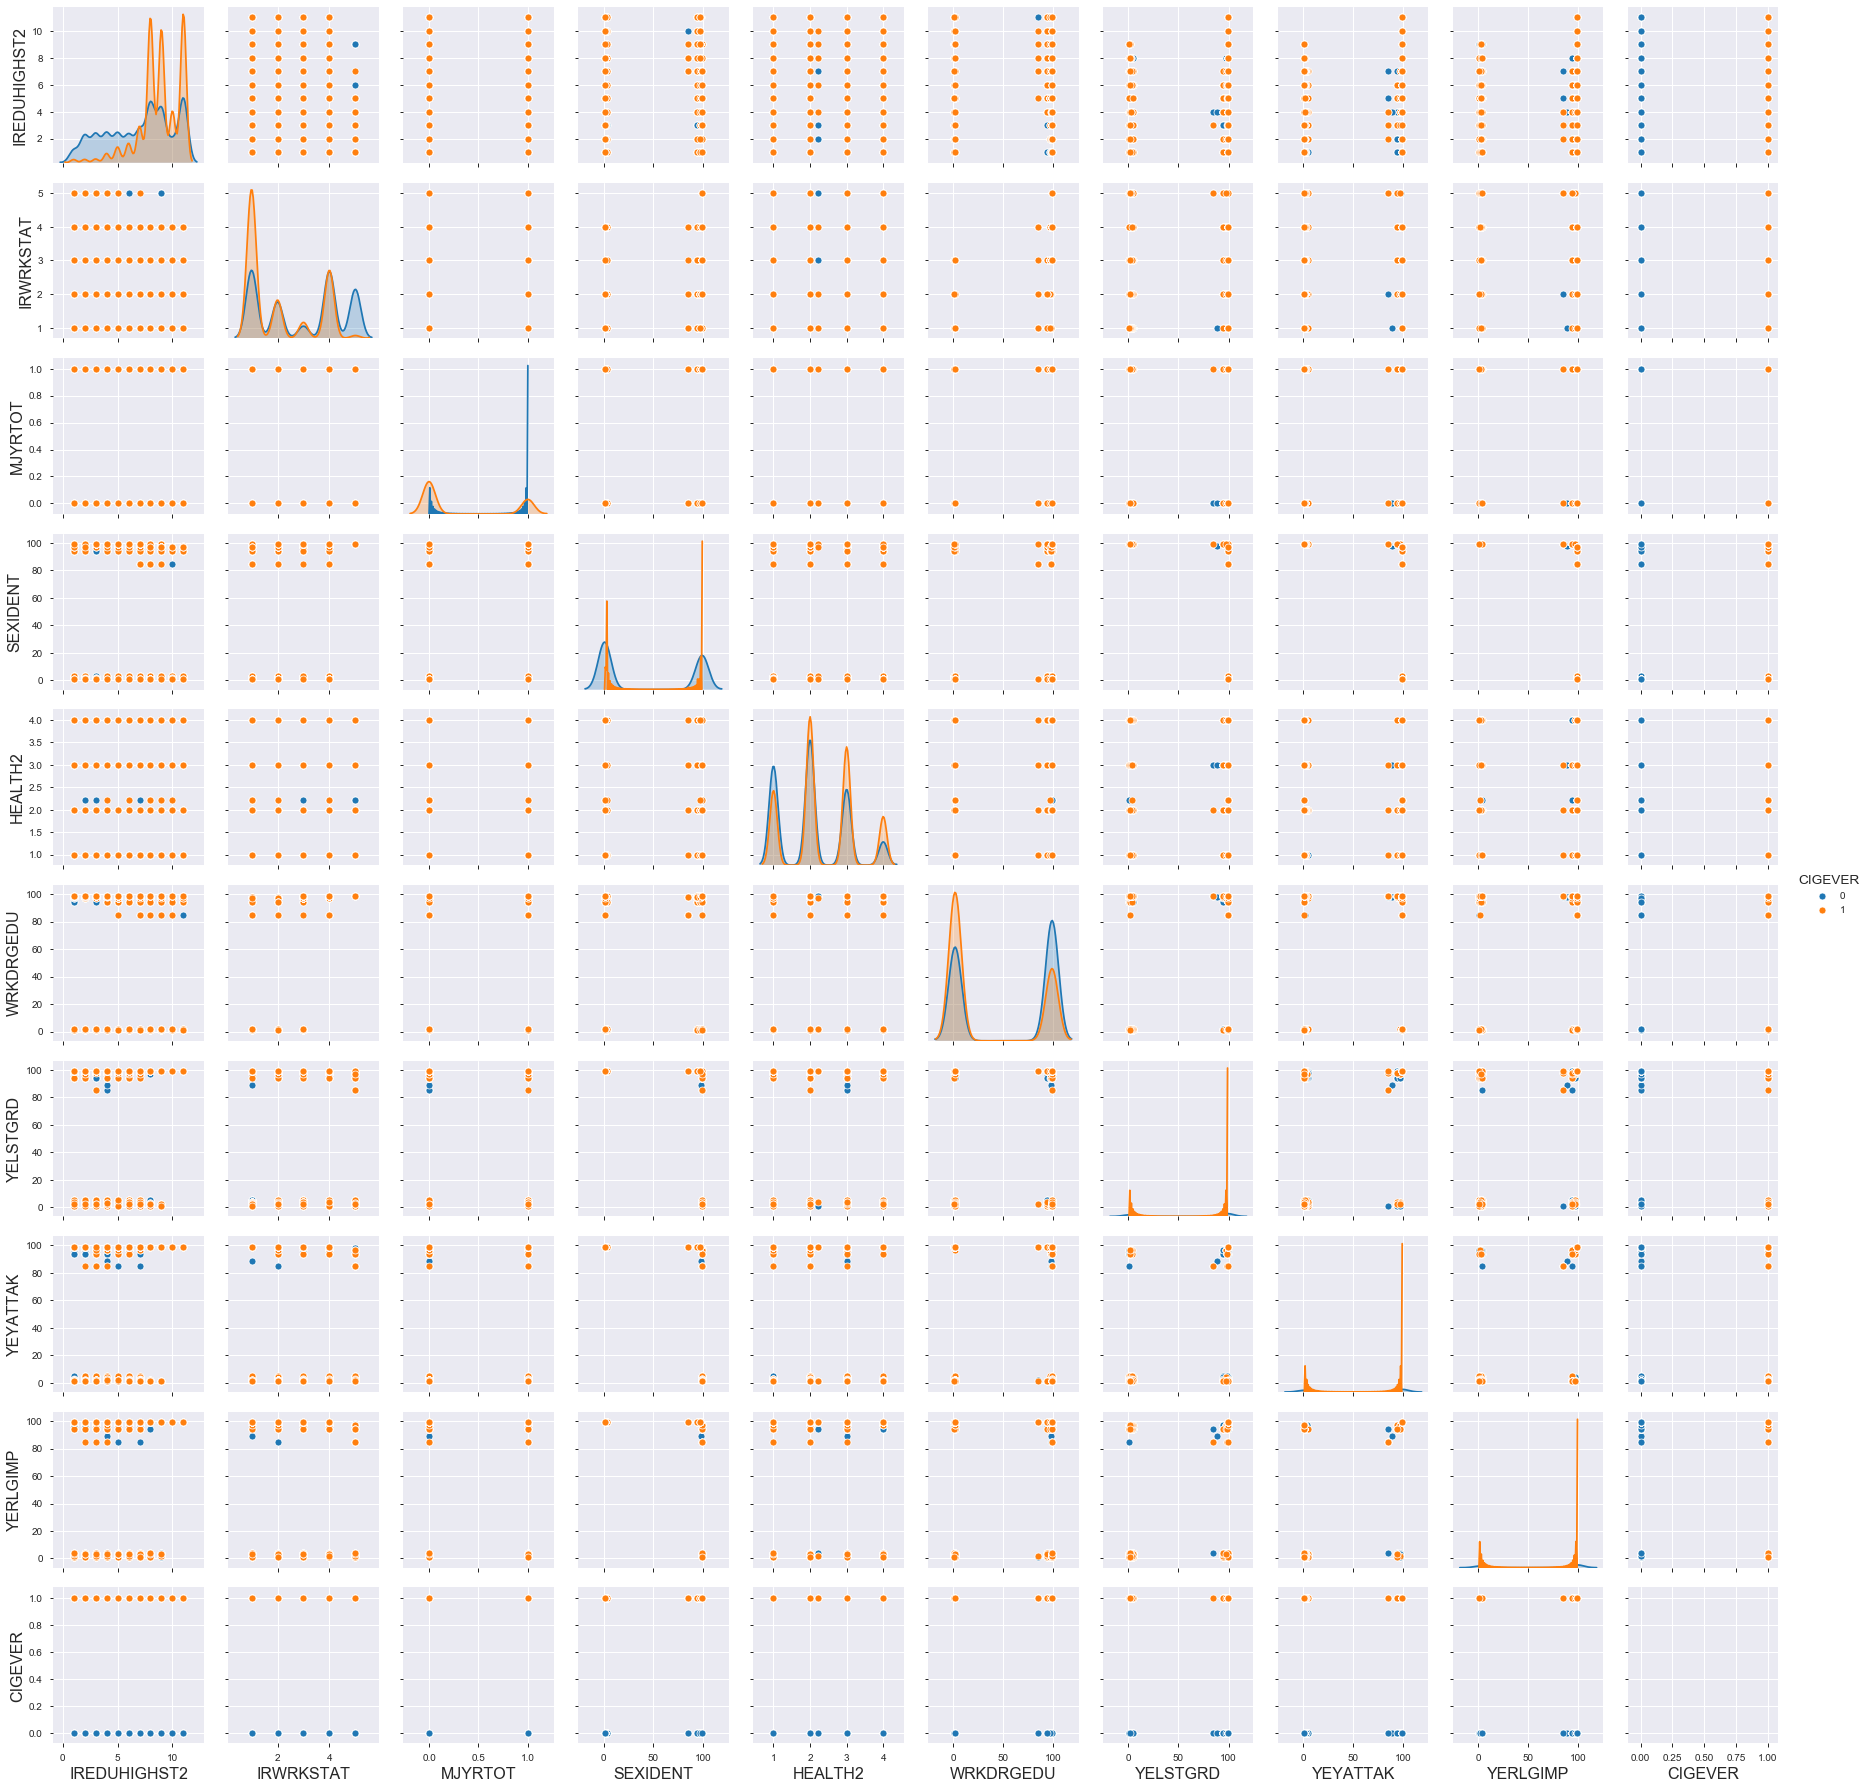

In [157]:
##### Basic correlogram

np.seterr(divide='ignore', invalid='ignore')

sns.pairplot(df1, hue = 'CIGEVER')
plt.show()


In [13]:
########### Seperate X and Y    
y = df1['CIGEVER']
X = df1.drop('CIGEVER', axis=1)  

In [14]:
X

,IREDUHIGHST2,IRWRKSTAT,MJYRTOT,SEXIDENT,HEALTH2,WRKDRGEDU,YELSTGRD,YEYATTAK,YERLGIMP
0,8,1,0,1,3.0,1,99,99,99
1,11,1,0,1,3.0,2,99,99,99
2,8,2,1,3,3.0,2,99,99,99
3,9,4,0,1,3.0,99,99,99,99
4,7,1,0,1,3.0,2,99,99,99
...,...,...,...,...,...,...,...,...,...
56308,5,2,0,99,2.0,2,2,1,4
56309,7,2,1,99,2.0,1,2,1,1
56310,9,2,0,1,1.0,2,99,99,99
56311,8,1,1,1,2.0,2,99,99,99


In [15]:
############# Standard scaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [1]:
X

NameError: name 'X' is not defined

In [17]:
############## train-test split
X_train, X_validate, y_train, y_validate = train_test_split(X_sc, y, test_size=0.3, random_state= 0)

In [18]:
def train_RFC(X_train, y_train):
    
    clf = RandomForestClassifier(n_estimators= 50, 
                                 criterion = 'gini', 
                                 max_depth = 100, 
                                 min_samples_split = 2, 
                                 random_state= 0, 
                                 oob_score = True,
                                 min_samples_leaf = 1,
                                 min_weight_fraction_leaf = 0.,
                                 max_features = 0.5,
                                 max_leaf_nodes = 1375,
                                 min_impurity_decrease = 0.,
                                 bootstrap = True,
                                 warm_start = True,
                                 class_weight = None
                                 )
    clf.fit(X_train, y_train)
    
    return (clf)

In [19]:
# Function to make predictions

def prediction(X_validate, clf):
    y_pred = clf.predict(X_validate)
    y_prob = clf.predict_proba(X_validate)
    
    return y_pred, y_prob

In [20]:
# Function to calculate accuracy

def cal_accuracy(y_validate, y_pred):
    conf_mtx = confusion_matrix(y_validate, y_pred)
    accuracy = accuracy_score(y_validate, y_pred) * 100
    report = classification_report(y_validate, y_pred)
    print("Confusion Matrix: ", conf_mtx)
    print("Accuracy: ", accuracy)
    print("Report: ", report)
    return conf_mtx

In [21]:
############ train with random forest
clf = train_RFC(X_train, y_train)
    
################ cross validation
scores = cross_val_score(clf, X_sc, y, cv=5)
print('cross validation score: ', scores)

cross validation score:  [0.68926301 0.68612877 0.68672757 0.68663801 0.6883396 ]


In [22]:
y_pred = prediction(X_validate, clf)[0]
# y_prob = prediction(X_validate, clf)[1]
cal_accuracy(y_validate, y_pred)

Confusion Matrix:  [[5266 3598]
 [1661 6225]]
Accuracy:  68.60298507462687
Report:                precision    recall  f1-score   support

           0       0.76      0.59      0.67      8864
           1       0.63      0.79      0.70      7886

    accuracy                           0.69     16750
   macro avg       0.70      0.69      0.68     16750
weighted avg       0.70      0.69      0.68     16750



array([[5266, 3598],
       [1661, 6225]], dtype=int64)

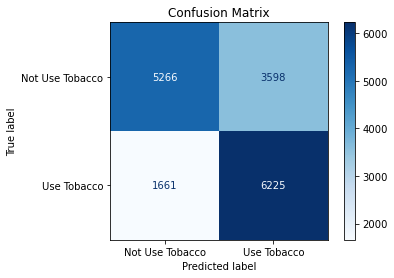

In [23]:
# Plot non-normalized confusion matrix

disp = plot_confusion_matrix(clf, X_validate, y_validate,
                            display_labels=("Not Use Tobacco", "Use Tobacco"),
                            values_format='d',
                            cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.grid(False)
plt.show()

Feature importance:  [(0.1977119615088351, 'SEXIDENT'), (0.16747900380925657, 'MJYRTOT'), (0.15535338266277796, 'YEYATTAK'), (0.1463802732288891, 'YERLGIMP'), (0.09610983518217227, 'IREDUHIGHST2'), (0.08845778858885095, 'YELSTGRD'), (0.0645446374733046, 'HEALTH2'), (0.04840043032151876, 'IRWRKSTAT'), (0.03556268722439463, 'WRKDRGEDU')]


Text(0.5, 0, 'Relative Importance')

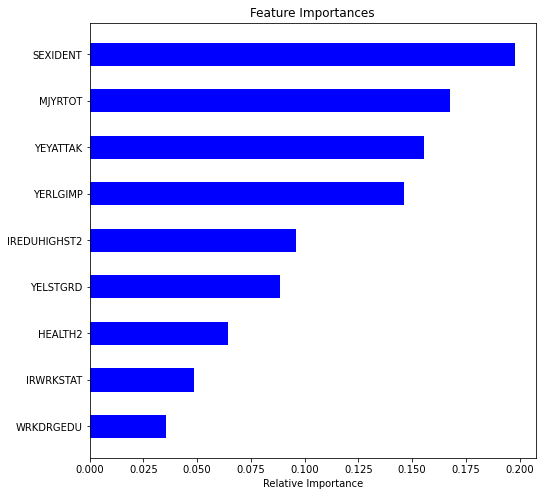

In [24]:
###### find out feature importance

importance = clf.feature_importances_
z = sorted(zip(importance, X.columns), reverse = False)
print('Feature importance: ', sorted(z, reverse = True))

m,n = zip(*z)
plt.figure(figsize=(8, 8))
plt.barh(n,m,height =0.5,color='b')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')

C:\Anaconda\Anaconda3\envs\insight\lib\site-packages\sklearn\ensemble\_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
C:\Anaconda\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
C:\Anaconda\Anaconda3\envs\insight\lib\site-packages\sklearn\ensemble\_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
C:\Anaconda\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
C:\Anaconda\Anaconda3\envs\insight\lib\site-packages\sklearn\ensemble\_forest.py:368: User

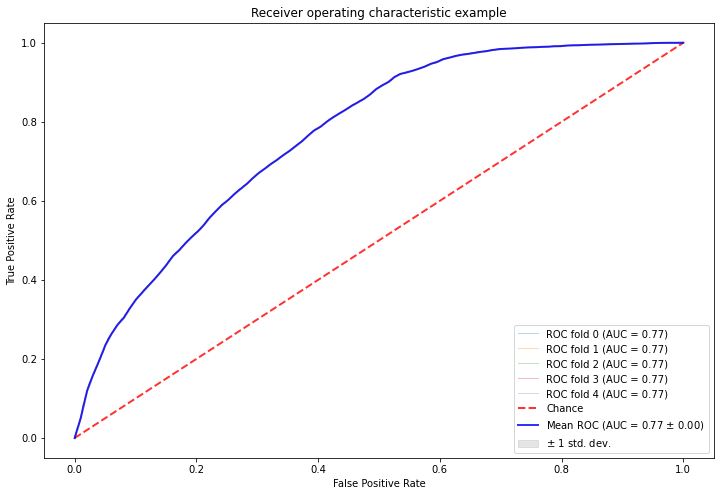

In [25]:
###################### ROC Analysis using Cross Validation
cv = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(12, 8))
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    clf.fit(X_train, y_train)
    viz = plot_roc_curve(clf, X_validate, y_validate, name='ROC fold {}'.format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()
fig.tight_layout()

In [27]:
############################### Save the trained model
joblib.dump(clf, 'C:\OMSCS\CS6242DVA\project\pickled_model/clf_tobacco.pkl')
# joblib.dump(X_train.columns, 'C:\OMSCS\CS6242DVA\project\pickled_model/X_train_columns')

['C:\\OMSCS\\CS6242DVA\\project\\pickled_model/clf_tobacco.pkl']